# 빅데이터분석 6주차 과제 201910803 박채희

In [14]:
import pyspark
myConf=pyspark.SparkConf()
spark=pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

In [17]:
df = spark.read.options(header='true', inferschema='true', delimiter=',').csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv')
df.count()

455

In [18]:
df.show()

+----------+------+
|   �뿩����|�뿩�Ǽ�|
+----------+------+
|2018-01-01|  4950|
|2018-01-02|  7136|
|2018-01-03|  7156|
|2018-01-04|  7102|
|2018-01-05|  7705|
|2018-01-06|  5681|
|2018-01-07|  5220|
|2018-01-08|  6309|
|2018-01-09|  5988|
|2018-01-10|  4476|
|2018-01-11|  4337|
|2018-01-12|  4401|
|2018-01-13|  3756|
|2018-01-14|  4675|
|2018-01-15|  6993|
|2018-01-16|  7421|
|2018-01-17|  6990|
|2018-01-18|  7054|
|2018-01-19|  8329|
|2018-01-20|  6148|
+----------+------+
only showing top 20 rows



In [22]:
df = df.withColumnRenamed('�뿩����','date')
df = df.withColumnRenamed('�뿩�Ǽ�','count')

In [23]:
df.show()

+----------+-----+
|      date|count|
+----------+-----+
|2018-01-01| 4950|
|2018-01-02| 7136|
|2018-01-03| 7156|
|2018-01-04| 7102|
|2018-01-05| 7705|
|2018-01-06| 5681|
|2018-01-07| 5220|
|2018-01-08| 6309|
|2018-01-09| 5988|
|2018-01-10| 4476|
|2018-01-11| 4337|
|2018-01-12| 4401|
|2018-01-13| 3756|
|2018-01-14| 4675|
|2018-01-15| 6993|
|2018-01-16| 7421|
|2018-01-17| 6990|
|2018-01-18| 7054|
|2018-01-19| 8329|
|2018-01-20| 6148|
+----------+-----+
only showing top 20 rows



### 문제 1-1: 년도별 대여건수 합계

In [28]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

year=udf(lambda x :'2018' if x[:4]=='2018' else '2019',StringType())
df=df.withColumn('year',year(df['date']))

In [29]:
df.show()

+----------+-----+----+
|      date|count|year|
+----------+-----+----+
|2018-01-01| 4950|2018|
|2018-01-02| 7136|2018|
|2018-01-03| 7156|2018|
|2018-01-04| 7102|2018|
|2018-01-05| 7705|2018|
|2018-01-06| 5681|2018|
|2018-01-07| 5220|2018|
|2018-01-08| 6309|2018|
|2018-01-09| 5988|2018|
|2018-01-10| 4476|2018|
|2018-01-11| 4337|2018|
|2018-01-12| 4401|2018|
|2018-01-13| 3756|2018|
|2018-01-14| 4675|2018|
|2018-01-15| 6993|2018|
|2018-01-16| 7421|2018|
|2018-01-17| 6990|2018|
|2018-01-18| 7054|2018|
|2018-01-19| 8329|2018|
|2018-01-20| 6148|2018|
+----------+-----+----+
only showing top 20 rows



In [30]:
df.groupby('year').agg({'count':'sum'}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2019|   1871935|
|2018|  10124874|
+----+----------+



### 문제 1-2: 년도별, 월별 대여건수 합계

In [31]:
month=udf(lambda x:x[5:7],StringType())
df=df.withColumn('month',month(df['date']))

In [32]:
df.show()

+----------+-----+----+-----+
|      date|count|year|month|
+----------+-----+----+-----+
|2018-01-01| 4950|2018|   01|
|2018-01-02| 7136|2018|   01|
|2018-01-03| 7156|2018|   01|
|2018-01-04| 7102|2018|   01|
|2018-01-05| 7705|2018|   01|
|2018-01-06| 5681|2018|   01|
|2018-01-07| 5220|2018|   01|
|2018-01-08| 6309|2018|   01|
|2018-01-09| 5988|2018|   01|
|2018-01-10| 4476|2018|   01|
|2018-01-11| 4337|2018|   01|
|2018-01-12| 4401|2018|   01|
|2018-01-13| 3756|2018|   01|
|2018-01-14| 4675|2018|   01|
|2018-01-15| 6993|2018|   01|
|2018-01-16| 7421|2018|   01|
|2018-01-17| 6990|2018|   01|
|2018-01-18| 7054|2018|   01|
|2018-01-19| 8329|2018|   01|
|2018-01-20| 6148|2018|   01|
+----------+-----+----+-----+
only showing top 20 rows



In [48]:
sum_df=df.groupby('year').pivot('month').agg({'count':'sum'})

In [49]:
sum_df.show()

+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|year|    01|    02|    03|    04|    05|     06|     07|     08|     09|     10|    11|    12|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|2019|495573|471543|904819|  null|  null|   null|   null|   null|   null|   null|  null|  null|
|2018|164367|168741|462661|687885|965609|1207123|1100015|1037505|1447993|1420621|961532|500822|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+



### 문제 1-3: 년도별, 월별 대여건수 그래프

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
sum_df_pandas=sum_df.toPandas()

In [64]:
sum_df_pandas.head()

,year,01,02,03,04,05,06,07,08,09,10,11,12
0,2019,495573,471543,904819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,164367,168741,462661,687885.0,965609.0,1207123.0,1100015.0,1037505.0,1447993.0,1420621.0,961532.0,500822.0


In [78]:
sum_df_pandas.set_index(['year'])

,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2019,495573,471543,904819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,164367,168741,462661,687885.0,965609.0,1207123.0,1100015.0,1037505.0,1447993.0,1420621.0,961532.0,500822.0


In [86]:
t=sum_df_pandas.drop('year',axis=1).T

In [92]:
t.rename(columns = {0 : '2018',1:'2019'}, inplace = True)

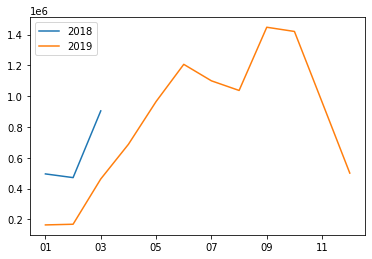

In [94]:
t.plot(kind='line')